# Raisin Class Prediction

Data Set Information:

Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.


Attribute Information:

1. Area: Gives the number of pixels within the boundaries of the raisin.
2. Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3. MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4. MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5. Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.
6. ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7. Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8. Class: Kecimen and Besni raisin.

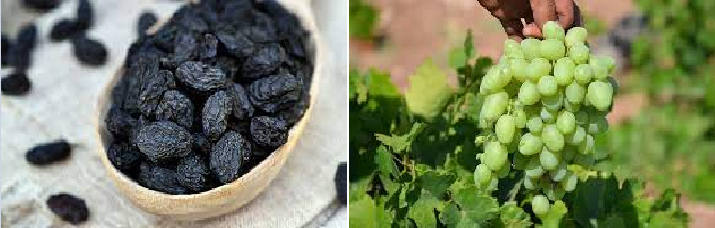

# Import libraries

In [144]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10, 6)
import warnings
warnings.filterwarnings("ignore")

## Exploratory Data Analysis and Visualization

In [145]:
pip install openpyxl



[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [146]:
import openpyxl

In [147]:
df = pd.read_excel("Raisin_Dataset.xlsx")
df.sample(10)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
70,95347,451.53,280.23,0.78,99256,0.67,1255.24,Kecimen
595,80481,481.06,217.56,0.89,85153,0.71,1219.11,Besni
422,34638,251.74,178.34,0.71,35824,0.75,713.94,Kecimen
433,74254,402.53,241.28,0.80,76702,0.73,1080.03,Kecimen
676,51350,342.66,204.01,0.80,54576,0.65,930.05,Besni
121,52266,320.44,213.86,0.74,54116,0.68,923.19,Kecimen
54,111450,478.31,298.63,0.78,113256,0.69,1298.19,Kecimen
181,67718,373.92,233.23,0.78,71102,0.74,1024.99,Kecimen
792,92024,453.72,260.49,0.82,94643,0.75,1204.62,Besni
353,53121,350.97,195.87,0.83,56120,0.73,930.62,Kecimen


In [148]:
df.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')



'Area': Nesnenin alanını ifade eder. Yani nesneyi çevreleyen piksellerin toplam sayısıdır. Genellikle piksel sayısı ya da alan hesaplamalarında kullanılır.

'MajorAxisLength': Nesnenin ana ekseni boyunca uzunluğunu ifade eder. Yani nesnenin en uzun boyutudur.

'MinorAxisLength': Nesnenin yan ekseni boyunca uzunluğunu ifade eder. Yani nesnenin en kısa boyutudur.

'Eccentricity': Bir nesnenin elips şeklinde olma derecesini ifade eder. 0 ile 1 arasında değer alır. 0, nesnenin tamamen yuvarlak olduğunu, 1 ise tam bir elips olduğunu gösterir.

'ConvexArea': Nesnenin dışbükey (convex) kabuğunun alanını ifade eder. Yani nesnenin çevresini saran en küçük dışbükey şeklin alanıdır.

'Extent': Bir nesnenin bölgenin tüm alanına oranını ifade eder. Yani nesnenin kendi alanının, çevreleyen dışbükey şeklin alanına oranıdır. 1, tam bir kaplama; 0, hiç kaplama olmadığını gösterir.

'Perimeter': Nesnenin çevresini ifade eder. Yani nesnenin dış hat uzunluğudur.

'Class': Nesnenin sınıfını ifade eder. 

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [150]:
df.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.00,900.00,900.00,900.00,900.00,900.00,900.00
mean,87804.13,430.93,254.49,0.78,91186.09,0.70,1165.91
std,39002.11,116.04,49.99,0.09,40769.29,0.05,273.76
min,25387.00,225.63,143.71,0.35,26139.00,0.38,619.07
25%,59348.00,345.44,219.11,0.74,61513.25,0.67,966.41
50%,78902.00,407.80,247.85,0.80,81651.00,0.71,1119.51
75%,105028.25,494.19,279.89,0.84,108375.75,0.73,1308.39
max,235047.00,997.29,492.28,0.96,278217.00,0.84,2697.75


In [151]:
df["Class"].value_counts() # balans bir data

Kecimen    450
Besni      450
Name: Class, dtype: int64

In [152]:
df.corr() # multi colinarty gözlemleniyor

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
Area,1.00,0.93,0.91,0.34,1.00,-0.01,0.96
MajorAxisLength,0.93,1.00,0.73,0.58,0.95,-0.20,0.98
MinorAxisLength,0.91,0.73,1.00,-0.03,0.90,0.15,0.83
Eccentricity,0.34,0.58,-0.03,1.00,0.35,-0.36,0.45
ConvexArea,1.00,0.95,0.90,0.35,1.00,-0.05,0.98
Extent,-0.01,-0.20,0.15,-0.36,-0.05,1.00,-0.17
Perimeter,0.96,0.98,0.83,0.45,0.98,-0.17,1.00


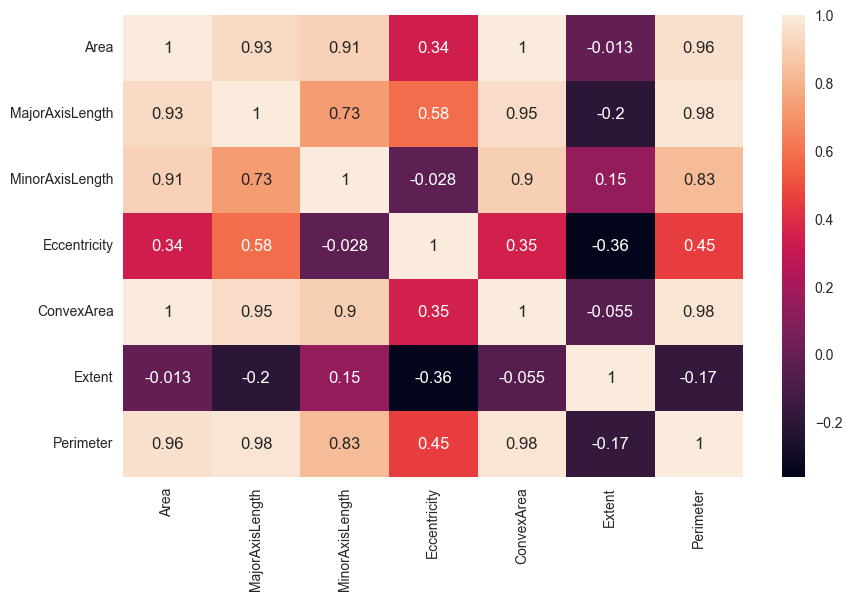

In [153]:
sns.heatmap(df.corr(), annot = True);

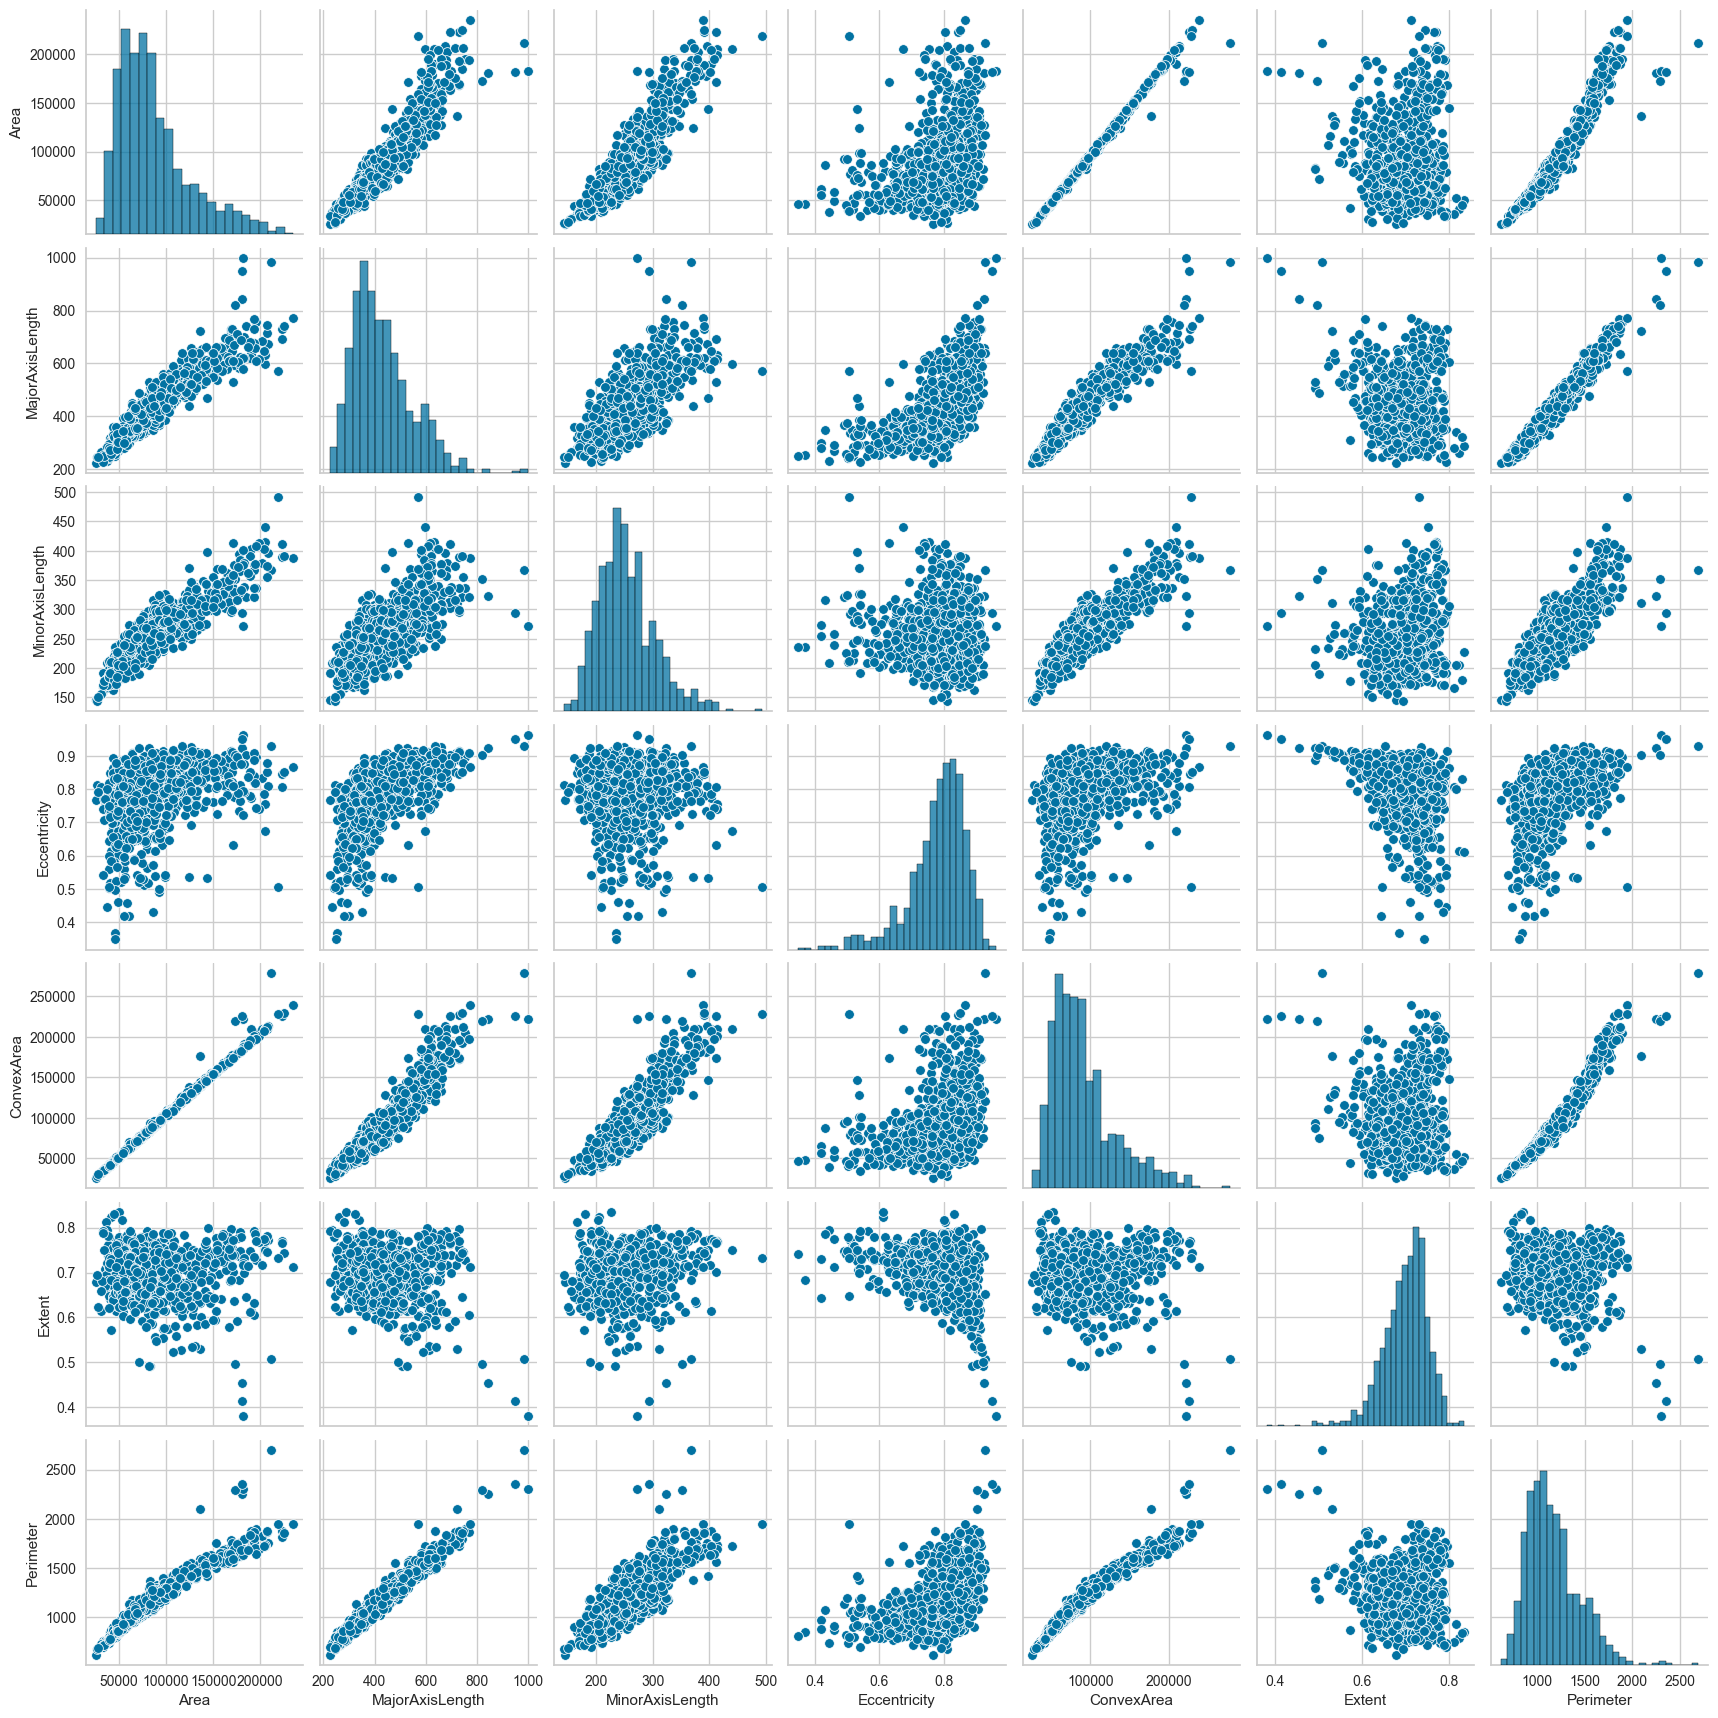

In [154]:
sns.pairplot(data=df)

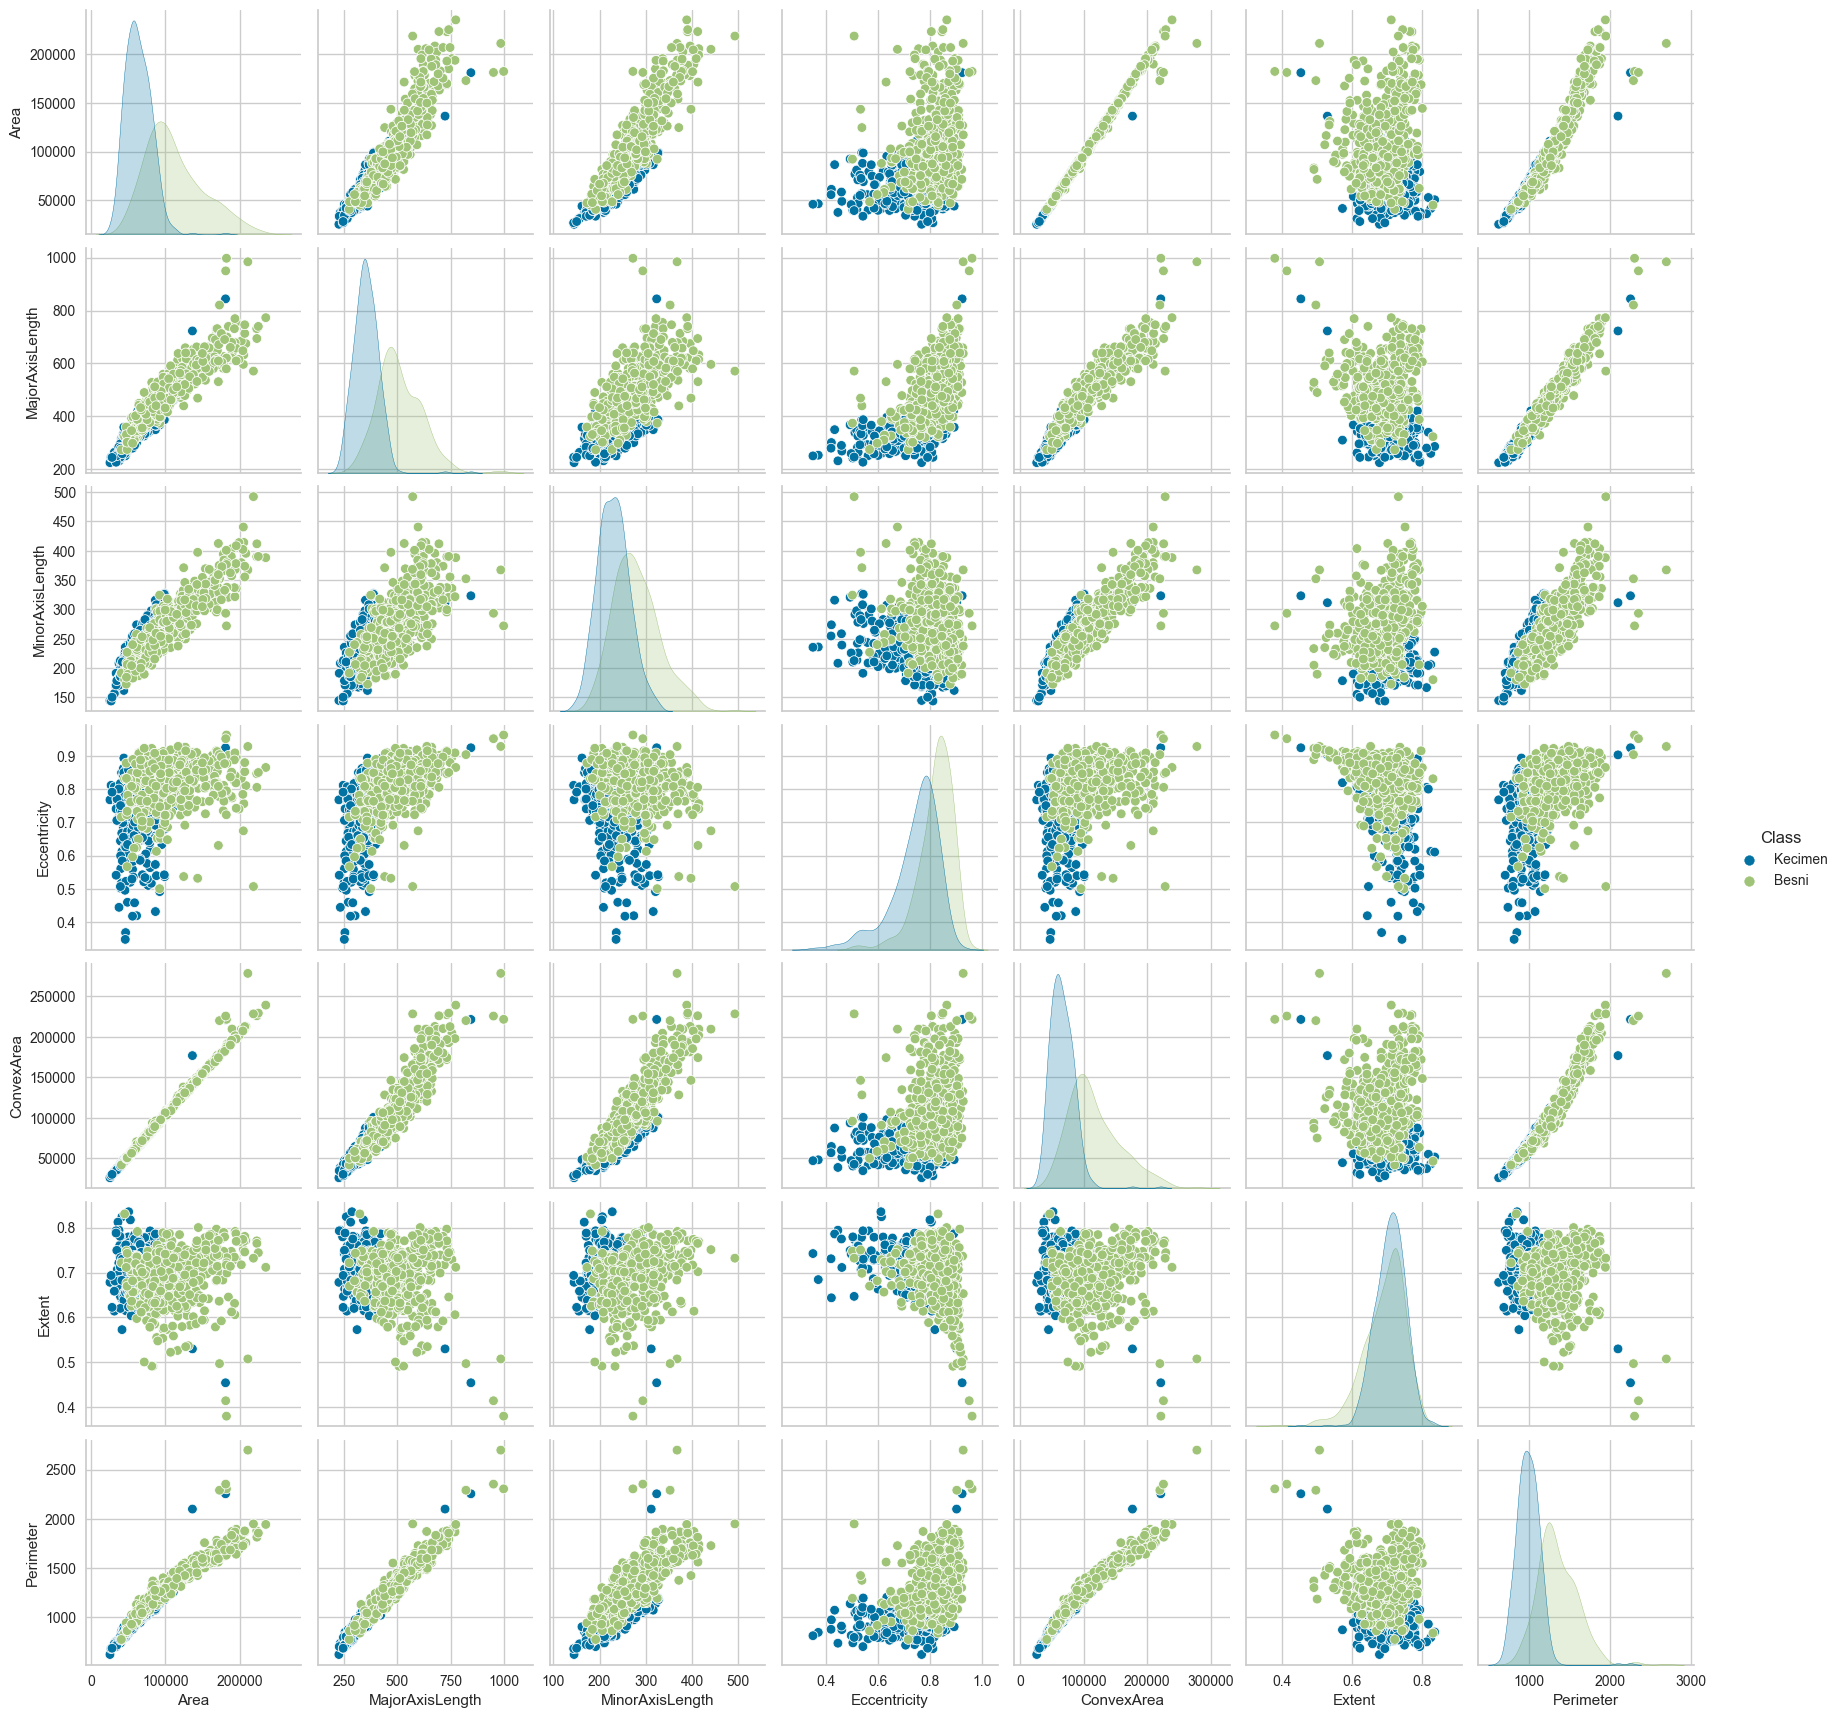

In [155]:
sns.pairplot(df, hue = "Class");  #  genelde grift bir yapı var

In [156]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
#%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
colors = df["Class"].map({"Kecimen":0, "Besni":1})
ax.scatter(df["Eccentricity"], df["ConvexArea"], df["MinorAxisLength"], c=colors);


In [157]:
import plotly.express as px
colors = df["Class"].map({"Kecimen":0, "Besni":1})
fig = px.scatter_3d(df, x="Eccentricity", y="ConvexArea", z="MinorAxisLength", color=colors)
fig.show()

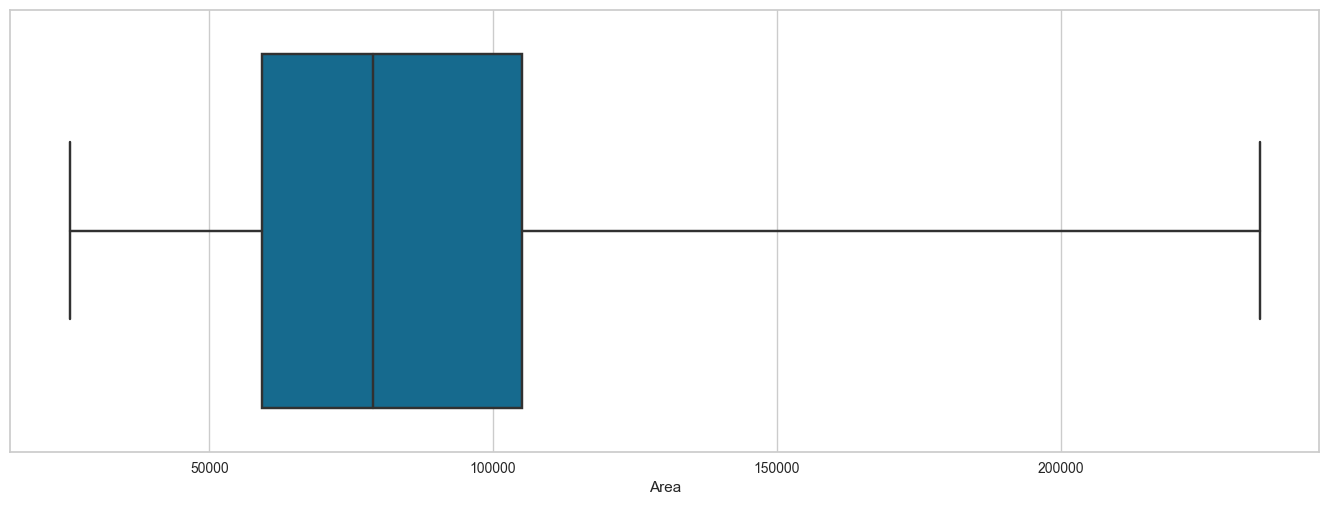

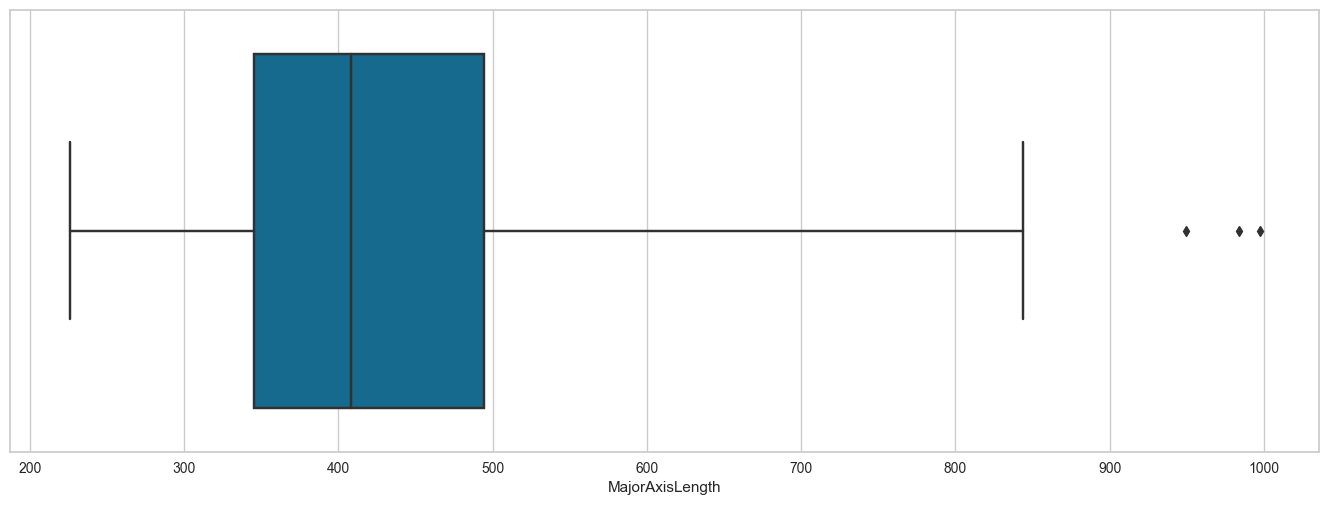

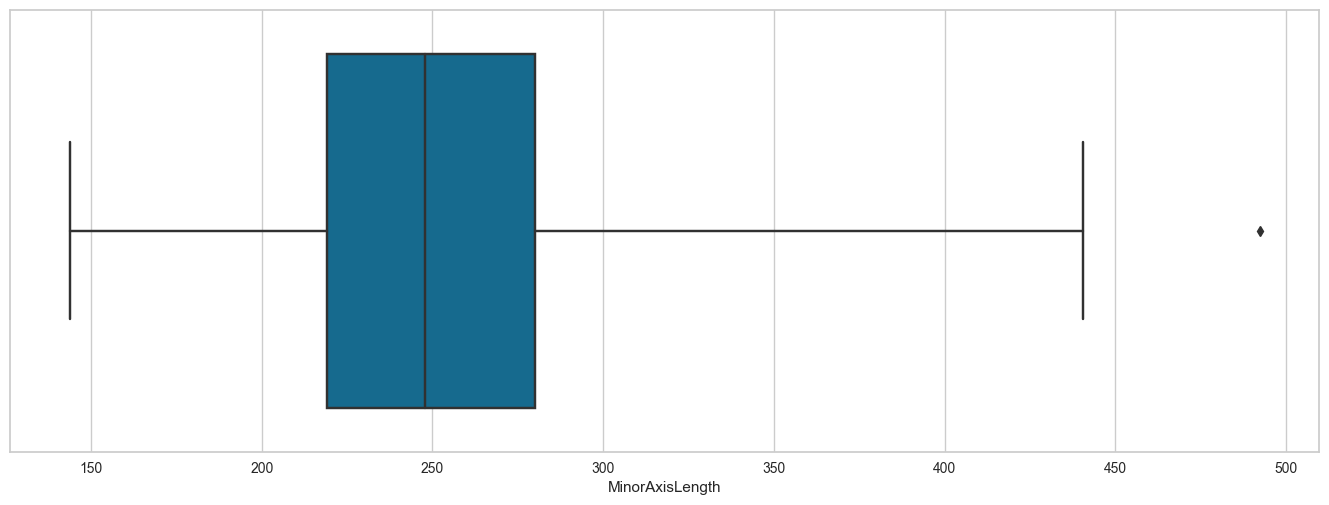

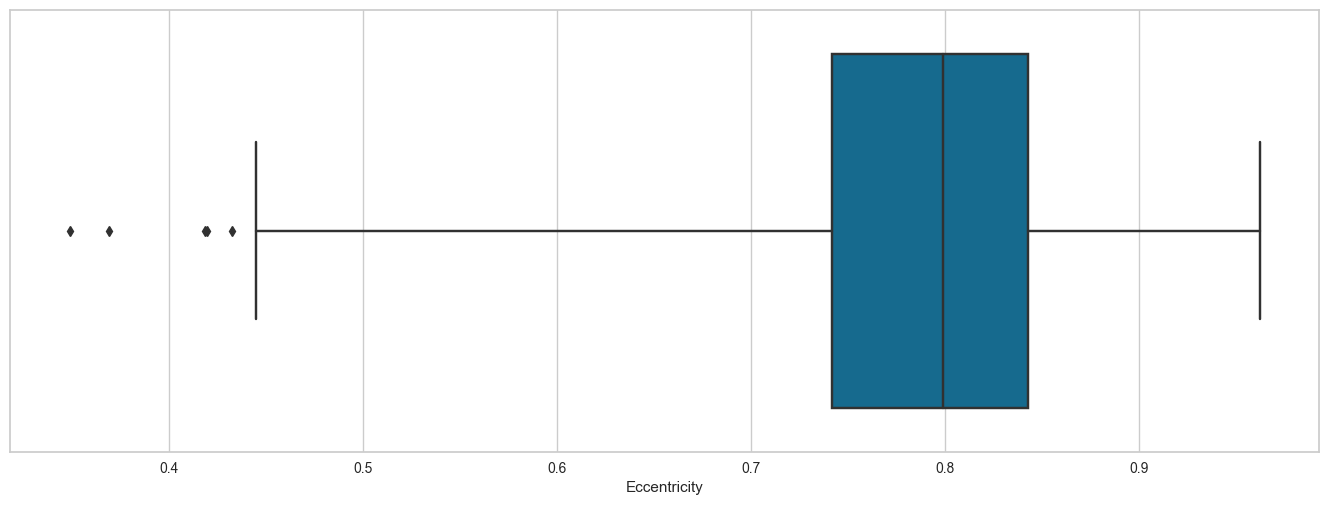

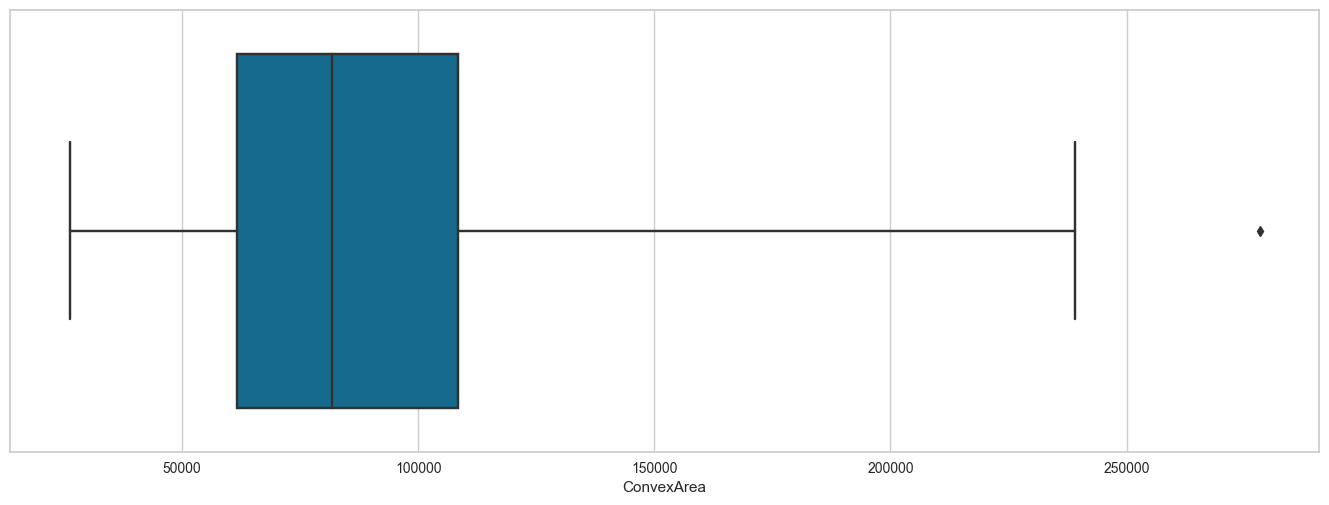

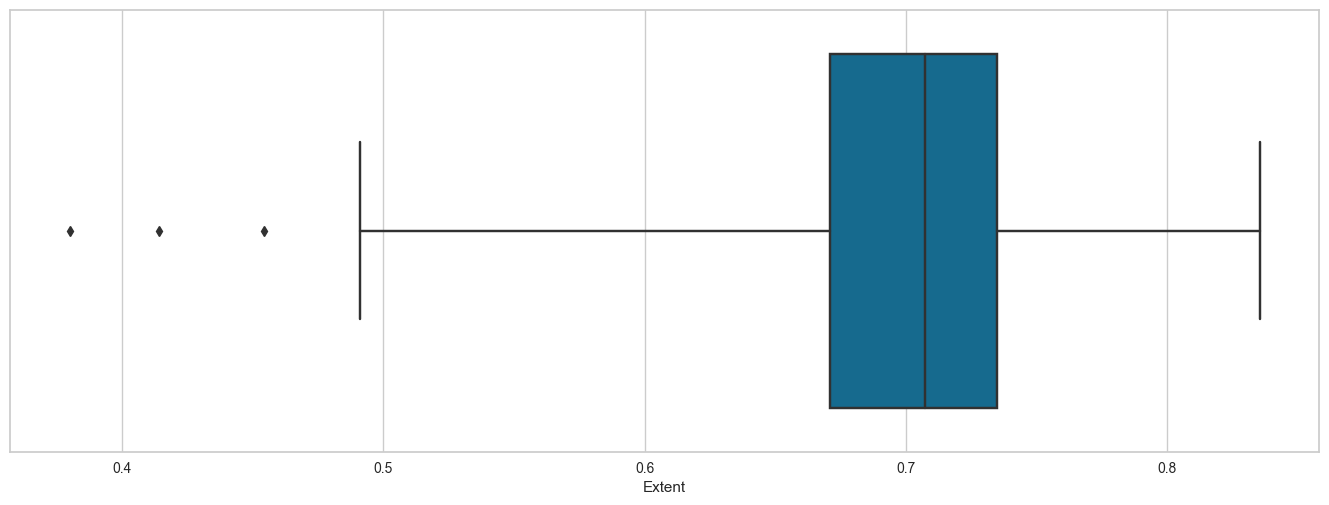

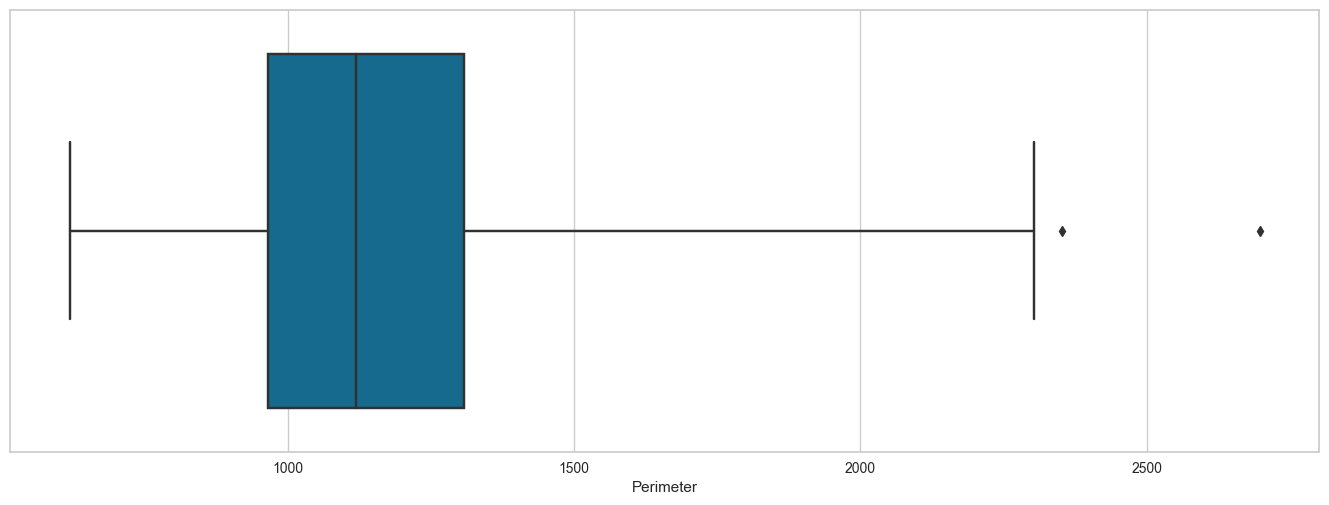

In [158]:
index=0
for feature in df.select_dtypes('number').columns:
    index+=1
    plt.figure(figsize=(40,40))
    plt.subplot((len(df.columns)),3,index)
    sns.boxplot(x=feature,data=df, whis=3) 
        
    plt.tight_layout()
    
    plt.show()

In [159]:
df["Class"] = df["Class"].map({"Besni": 0, "Kecimen": 1}) # threshold kısmında hata aldığım için class sınıfını 0 ve 1 olarak düzenledim

## Train | Test Split and Scaling

In [160]:
X =df.drop("Class",axis=1)
y= df["Class"]

In [161]:
from sklearn.model_selection import train_test_split

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [163]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = StandardScaler()

In [164]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[ 0.75106207,  0.41990635,  1.17688387, ...,  0.71769468,
         0.45627178,  0.71171931],
       [ 0.66451096,  1.27602603,  0.14642306, ...,  0.71125988,
        -0.91234575,  1.05471877],
       [ 0.74196472,  0.75985771,  0.69649065, ...,  0.72097279,
         0.23244067,  0.75654943],
       ...,
       [ 1.98779517,  1.51063312,  1.8794452 , ...,  1.88659529,
         0.99077238,  1.48624012],
       [-1.51058769, -1.59451113, -2.05236784, ..., -1.48242598,
        -1.40984086, -1.76522946],
       [-0.76278618, -1.04155205, -0.25574613, ..., -0.78702992,
         0.20100398, -0.93024072]])

In [165]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 0.18583915,  0.1706735 ,  0.51044534, ...,  0.19159471,
        -0.44642418,  0.32263826],
       [-0.66036527, -0.73349989, -0.37278645, ..., -0.58218457,
         0.05342844, -0.37651745],
       [-0.89204425, -1.26821021, -0.24100886, ..., -0.88644159,
         0.70230575, -0.98902666],
       ...,
       [-0.52029148, -0.70722988, -0.13106125, ..., -0.52835075,
         0.83542796, -0.61858257],
       [-0.76248294, -0.47447017, -1.07536564, ..., -0.76240769,
         0.2821132 , -0.68581132],
       [-0.71189161, -0.81365222, -0.52028713, ..., -0.74589573,
         0.01697259, -0.91496411]])

# Logistic Regression

In [166]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [167]:
log_model = LogisticRegression()

In [168]:
log_model.fit(X_train_scaled,y_train)

LogisticRegression()

In [169]:
y_pred = log_model.predict(X_test_scaled)
y_pred # 0 besni, 1 keçimen

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1], dtype=int64)

In [170]:
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba  #1. besni,2. keçimen....

array([[7.97945491e-01, 2.02054509e-01],
       [2.61316310e-01, 7.38683690e-01],
       [2.46845088e-02, 9.75315491e-01],
       [9.68371812e-01, 3.16281879e-02],
       [2.19825475e-02, 9.78017453e-01],
       [4.86597761e-01, 5.13402239e-01],
       [1.44891904e-02, 9.85510810e-01],
       [5.60818730e-01, 4.39181270e-01],
       [3.67701205e-01, 6.32298795e-01],
       [3.34392561e-01, 6.65607439e-01],
       [7.19404960e-01, 2.80595040e-01],
       [9.78015609e-01, 2.19843913e-02],
       [9.87727829e-01, 1.22721714e-02],
       [2.11148250e-01, 7.88851750e-01],
       [9.98218521e-01, 1.78147945e-03],
       [9.93577193e-01, 6.42280672e-03],
       [6.45466053e-01, 3.54533947e-01],
       [9.51848023e-03, 9.90481520e-01],
       [4.10663691e-01, 5.89336309e-01],
       [7.15649912e-01, 2.84350088e-01],
       [1.67893201e-01, 8.32106799e-01],
       [9.96339663e-01, 3.66033662e-03],
       [8.92970525e-02, 9.10702948e-01],
       [1.04758088e-01, 8.95241912e-01],
       [9.924367

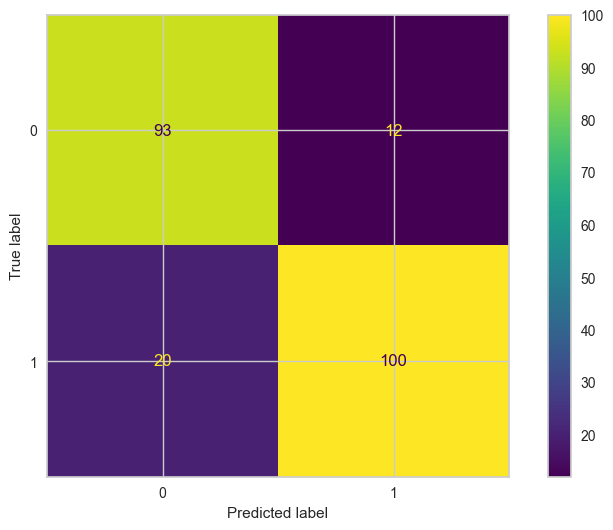

In [171]:
plot_confusion_matrix(log_model, X_test_scaled, y_test); # besni Negatif, keçimen Pozitif 

In [172]:
confusion_matrix(y_test, log_model.predict(X_test_scaled))

array([[ 93,  12],
       [ 20, 100]], dtype=int64)

## Model Performance

In [173]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [174]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test) 

Test_Set
[[ 93  12]
 [ 20 100]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.89      0.83      0.86       120

    accuracy                           0.86       225
   macro avg       0.86      0.86      0.86       225
weighted avg       0.86      0.86      0.86       225


Train_Set
[[293  52]
 [ 37 293]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       345
           1       0.85      0.89      0.87       330

    accuracy                           0.87       675
   macro avg       0.87      0.87      0.87       675
weighted avg       0.87      0.87      0.87       675



### Cross Validate

In [175]:
from sklearn.model_selection import cross_validate

model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision_weighted','recall_weighted',
                                                                   'f1_weighted'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]  # skorlarım az da olsa düştü

test_accuracy             0.87
test_precision_weighted   0.87
test_recall_weighted      0.87
test_f1_weighted          0.87
dtype: float64

### GridSearchCV

In [176]:
solver = ["liblinear"]
penalty = [ "l1","l2"]   
C = np.logspace(-1, 5, 20) 
param_grid = {"penalty" : penalty,"solver" : solver,
             "C" : C}

In [177]:
grid_model = GridSearchCV(log_model, param_grid = param_grid, cv=10)

In [178]:
grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']})

In [179]:
grid_model.best_params_

{'C': 7.847599703514611, 'penalty': 'l1', 'solver': 'liblinear'}

In [180]:
y_pred = grid_model.predict(X_test_scaled)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1], dtype=int64)

In [181]:
grid_model.best_score_

0.8741000877963125

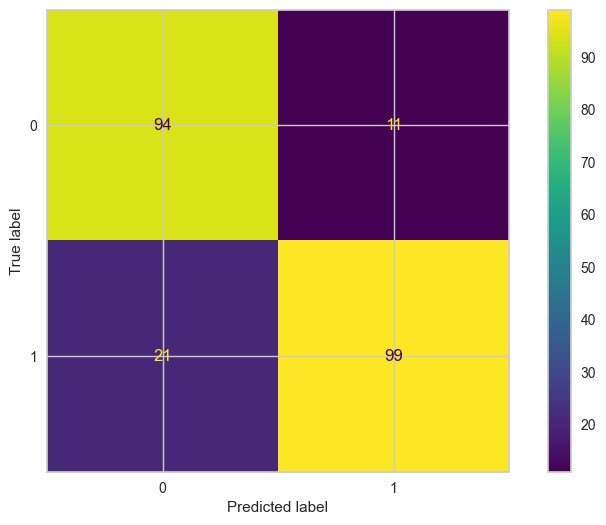

In [182]:
plot_confusion_matrix(grid_model, X_test_scaled, y_test)
plt.show()

In [183]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test) 

Test_Set
[[94 11]
 [21 99]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.85       105
           1       0.90      0.82      0.86       120

    accuracy                           0.86       225
   macro avg       0.86      0.86      0.86       225
weighted avg       0.86      0.86      0.86       225


Train_Set
[[297  48]
 [ 34 296]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       345
           1       0.86      0.90      0.88       330

    accuracy                           0.88       675
   macro avg       0.88      0.88      0.88       675
weighted avg       0.88      0.88      0.88       675



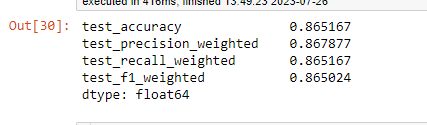

## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [184]:
from sklearn.metrics import plot_roc_curve

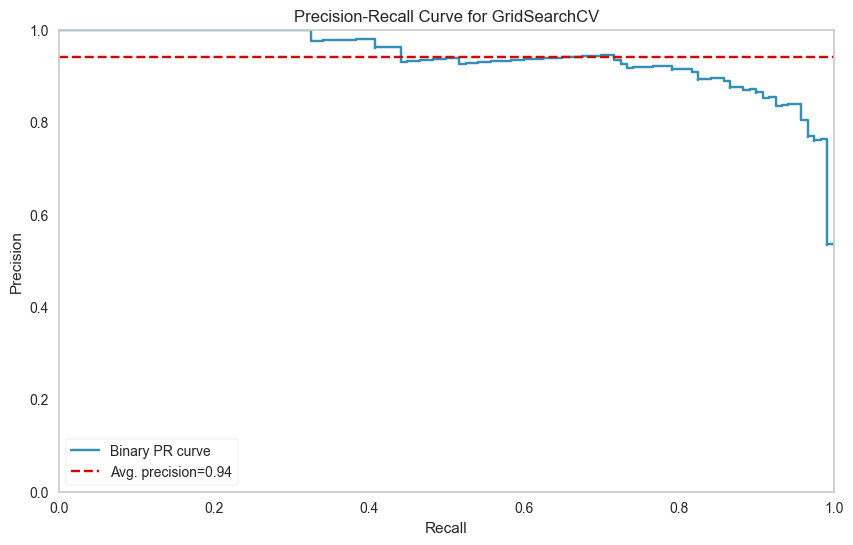

In [185]:
from yellowbrick.classifier import PrecisionRecallCurve

model = grid_model

viz = PrecisionRecallCurve(
    model,
    per_class=True, 
    cmap="Set1"
)
viz.fit(X_train_scaled, y_train)  
viz.score(X_test_scaled, y_test)
viz.show();

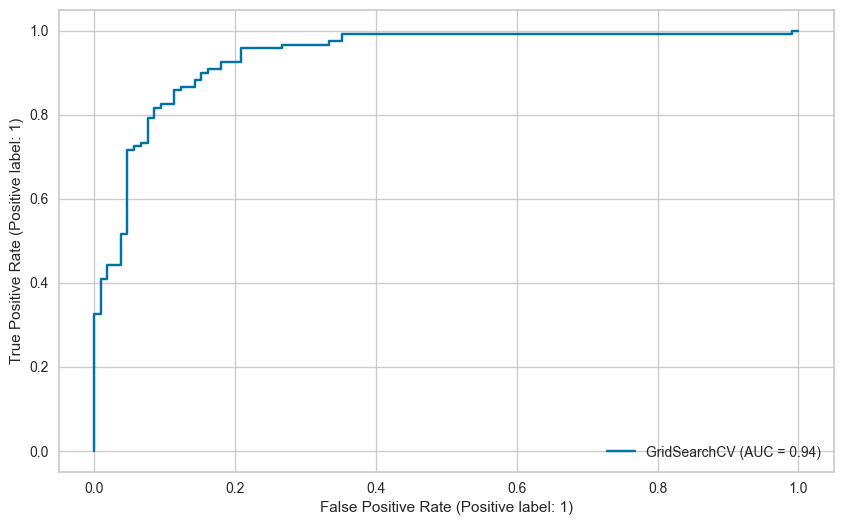

In [186]:
plot_roc_curve(grid_model, X_test_scaled, y_test);
plt.show()

In [187]:
solver = ["liblinear"]
penalty = [ "l1","l2"]   
C = np.logspace(-1, 5, 20) 
param_grid = {"penalty" : penalty,"solver" : solver,
             "C" : C}

In [188]:
grid_mode_r = GridSearchCV(log_model, param_grid = param_grid, cv=10, scoring = "recall")

In [189]:
grid_mode_r.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='recall')

In [190]:
grid_mode_r.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [191]:
eval_metric(grid_mode_r, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[ 93  12]
 [ 20 100]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.89      0.83      0.86       120

    accuracy                           0.86       225
   macro avg       0.86      0.86      0.86       225
weighted avg       0.86      0.86      0.86       225


Train_Set
[[287  58]
 [ 30 300]]
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       345
           1       0.84      0.91      0.87       330

    accuracy                           0.87       675
   macro avg       0.87      0.87      0.87       675
weighted avg       0.87      0.87      0.87       675



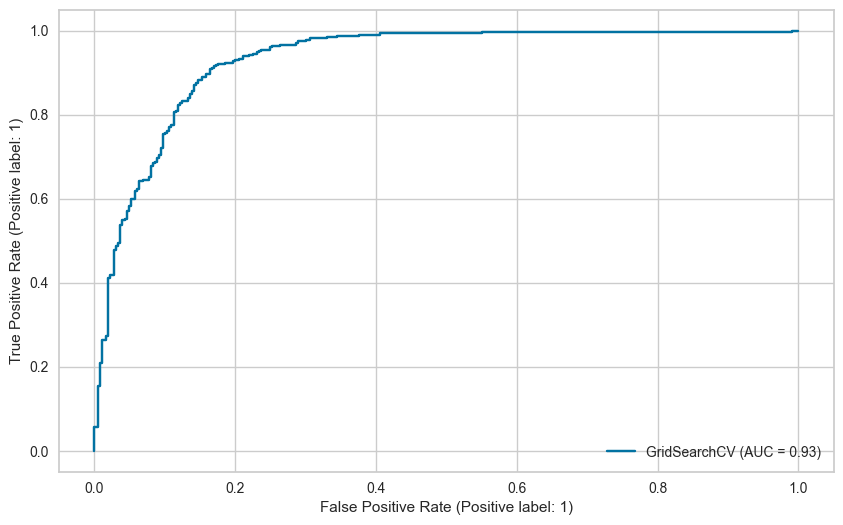

In [192]:
plot_roc_curve(grid_mode_r, X_train_scaled, y_train);  
plt.show()

In [193]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

In [194]:
y_pred_proba = log_model.predict_proba(X_train_scaled)
roc_auc_score(y_train, y_pred_proba[:,1])

0.9301273605621432

In [195]:
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])

In [196]:
fp_tp_th = fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])
df_fp_tp_th = pd.DataFrame(fp_tp_th)
df_fp_tp_th

,0,1,2,3,4,5,6,7,8,9,...,136,137,138,139,140,141,142,143,144,145
0,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.01,...,0.33,0.37,0.37,0.39,0.39,0.54,0.54,0.99,0.99,1.00
1,0.00,0.00,0.06,0.06,0.12,0.12,0.18,0.18,0.19,0.19,...,0.99,0.99,0.99,0.99,0.99,0.99,1.00,1.00,1.00,1.00
2,1.99,0.99,0.98,0.98,0.97,0.97,0.96,0.96,0.96,0.95,...,0.21,0.18,0.18,0.17,0.17,0.07,0.07,0.00,0.00,0.00


In [197]:
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx] 
optimal_threshold

0.44245649947303745

In [198]:
y_pred2 = pd.Series(grid_mode_r.predict_proba(X_test_scaled)[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)

In [199]:
print(confusion_matrix(y_test,y_pred2))  # recall 1 in yani keçimenleri doğru bilme oranım yükseldi.
                                            # tresholdu 0.44 e çekince 4 tane daha keçimeni doğru bildim
print(classification_report(y_test,y_pred2))

[[ 90  15]
 [ 16 104]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       105
           1       0.87      0.87      0.87       120

    accuracy                           0.86       225
   macro avg       0.86      0.86      0.86       225
weighted avg       0.86      0.86      0.86       225



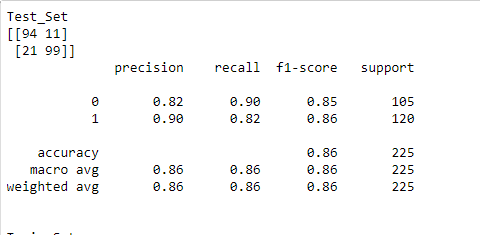

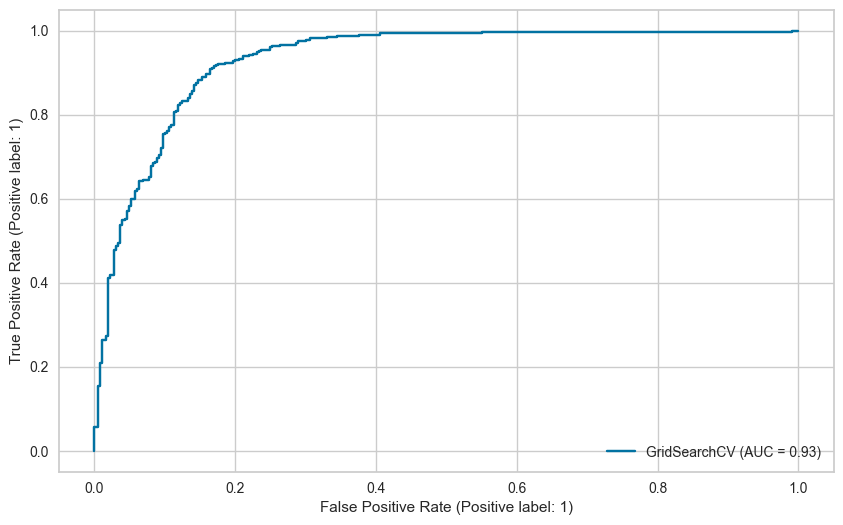

In [200]:
plot_roc_curve(grid_mode_r, X_train_scaled, y_train);  
plt.show()

# Conclusion 

- Yukarıda da görüldüğü üzere threshold seviyesini 0.44 e çekildiğinde recall ve precision skorlarım dengelendi ve matriste de doğru sayım 1 tane daha arttı, accuracy değerim de ise değişiklik olmadı. bu yüzden final modelde recall skorlarını kullanacağım ve thresholdu 0.44 olarak uygulayacağım.

In [120]:
scaler = StandardScaler().fit(X)

In [121]:
import pickle
pickle.dump(scaler, open("scaler_raisin", 'wb'))

In [122]:
X_scaled = scaler.transform(X)

In [123]:
final_model = LogisticRegression(C=0.1, class_weight = "balanced", penalty='l1', solver='liblinear').fit(X_scaled, y)

In [131]:
pickle.dump(final_model, open("final_model_raisin", 'wb'))

In [126]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,900.00,87804.13,39002.11,25387.00,59348.00,78902.00,105028.25,235047.00
MajorAxisLength,900.00,430.93,116.04,225.63,345.44,407.80,494.19,997.29
MinorAxisLength,900.00,254.49,49.99,143.71,219.11,247.85,279.89,492.28
Eccentricity,900.00,0.78,0.09,0.35,0.74,0.80,0.84,0.96
ConvexArea,900.00,91186.09,40769.29,26139.00,61513.25,81651.00,108375.75,278217.00
Extent,900.00,0.70,0.05,0.38,0.67,0.71,0.73,0.84
Perimeter,900.00,1165.91,273.76,619.07,966.41,1119.51,1308.39,2697.75


In [137]:
my_dict = {"Area": [87800, 75450, 150236],
          "MajorAxisLength": [480, 760, 320],
          "MinorAxisLength": [280, 480, 215],
          "Eccentricity": [0.43,0.38,0.78],
          "ConvexArea": [48997, 32768, 55452],
          "Extent": [0.12, 0.65, 0.34],
          "Perimeter": [396, 1524, 834]
          }

In [138]:
sample = pd.DataFrame(my_dict)
sample

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,87800,480,280,0.43,48997,0.12,396
1,75450,760,480,0.38,32768,0.65,1524
2,150236,320,215,0.78,55452,0.34,834


In [139]:
scaler_raisin = pickle.load(open("scaler_raisin", "rb"))

In [140]:
sample_scaled = scaler_raisin.transform(sample)
sample_scaled

array([[-1.05893572e-04,  4.23124767e-01,  5.10634387e-01,
        -3.89441770e+00, -1.03540061e+00, -1.08443924e+01,
        -2.81386096e+00],
       [-3.16931481e-01,  2.83752899e+00,  4.51374702e+00,
        -4.44832250e+00, -1.43369118e+00, -9.26447000e-01,
         1.30876250e+00],
       [ 1.60162061e+00, -9.56534789e-01, -7.90377218e-01,
        -1.70840862e-02, -8.76982619e-01, -6.72750939e+00,
        -1.21305504e+00]])

In [141]:
final_model = pickle.load(open("final_model_raisin", "rb"))

In [142]:
predictions = final_model.predict(sample_scaled)
predictions_proba = final_model.predict_proba(sample_scaled)
predictions2 = [1 if i >= optimal_threshold else 0 for i in predictions_proba[:,1]]

In [143]:
sample["pred_proba"] = predictions_proba[:,1]

sample["pred_0.44"] = predictions2
sample

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,pred_proba,pred_0.44
0,87800,480,280,0.43,48997,0.12,396,1.00,1
1,75450,760,480,0.38,32768,0.65,1524,0.25,0
2,150236,320,215,0.78,55452,0.34,834,0.94,1


In [125]:
#!pip install lazypredict
import lazypredict
from lazypredict.Supervised import LazyClassifier
reg = LazyClassifier(verbose = 0, ignore_warnings = False, custom_metric = None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
predictions


[notice] A new release of pip available: 22.2.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     -------------------------------------- 77.1/77.1 kB 711.2 kB/s eta 0:00:00
     ---------------------------------------- 97.9/97.9 kB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 945.1 kB/s eta 0:00:00
     ---------------------------------------- 70.9/70.9 MB 2.5 MB/s eta 0:00:00


 24%|████████████████████                                                               | 7/29 [00:01<00:02,  7.46it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 90%|█████████████████████████████████████████████████████████████████████████▌        | 26/29 [00:05<00:00,  5.05it/s]

StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'


 97%|███████████████████████████████████████████████████████████████████████████████▏  | 28/29 [00:05<00:00,  4.65it/s]

[LightGBM] [Info] Number of positive: 330, number of negative: 345
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000590 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1577
[LightGBM] [Info] Number of data points in the train set: 675, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.488889 -> initscore=-0.044452
[LightGBM] [Info] Start training from score -0.044452
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:07<00:00,  4.01it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NuSVC,0.87,0.87,0.87,0.87,0.16
AdaBoostClassifier,0.87,0.87,0.87,0.87,0.54
SVC,0.87,0.87,0.87,0.87,0.25
NearestCentroid,0.87,0.87,0.87,0.87,0.07
RidgeClassifier,0.86,0.86,0.86,0.86,0.09
LinearDiscriminantAnalysis,0.86,0.86,0.86,0.86,0.12
LinearSVC,0.86,0.86,0.86,0.86,0.12
CalibratedClassifierCV,0.86,0.86,0.86,0.86,0.39
RidgeClassifierCV,0.86,0.86,0.86,0.86,0.06
